# Sentiment Analysis

In [1]:
# Import important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Extract Transform Load (ETL)

In [2]:
data = pd.read_csv('GBcomments.csv', error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
data.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [ ]:
# Install 'textblob' library for sentiment analysis
# !pip install textblob

In [4]:
from textblob import TextBlob

In [6]:
# Checking the polarit of a text
# Polarity is showing the positivity, negativity, and neutrality of the text provided
# +1 is more positive, -1 is more negative, and 0 is neutral 
TextBlob('Thank gosh, a place I can watch it without hav...	').sentiment.polarity

0.0

In [7]:
# Checking the data for empty values
data.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [8]:
# Drop the empty values if any
data.dropna(inplace=True)

In [9]:
# And check the result
data.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [10]:
# Find the polarity of the 'Comment_text' column
polarity_data = []
for i in data['comment_text']:
    polarity_data.append(TextBlob(i).sentiment.polarity)

In [11]:
# Define a new column named 'polarity_data' in data and assign the values of 'polarity_data'
data['polarity_data'] = polarity_data

In [12]:
data.head()

,video_id,comment_text,likes,replies,polarity_data
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


## I) Positive Sentiment Analysis

In [13]:
# Extratct the comments whose polarity is 1
positive_polarity = data[data['polarity_data'] == 1]

In [14]:
positive_polarity.head()

,video_id,comment_text,likes,replies,polarity_data
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


## Exploratory Data Analysis (EDA)

In [ ]:
# Install 'wordcloud' for visualization of text data
# !pip install wordcloud

In [15]:
from wordcloud import WordCloud, STOPWORDS

In [16]:
stopwords = set(STOPWORDS)

In [17]:
# Combine all positive comments to remove the extra white spaces
total_positive_comments = ' '.join(positive_polarity['comment_text'])

In [18]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_positive_comments)

(-0.5, 999.5, 499.5, -0.5)

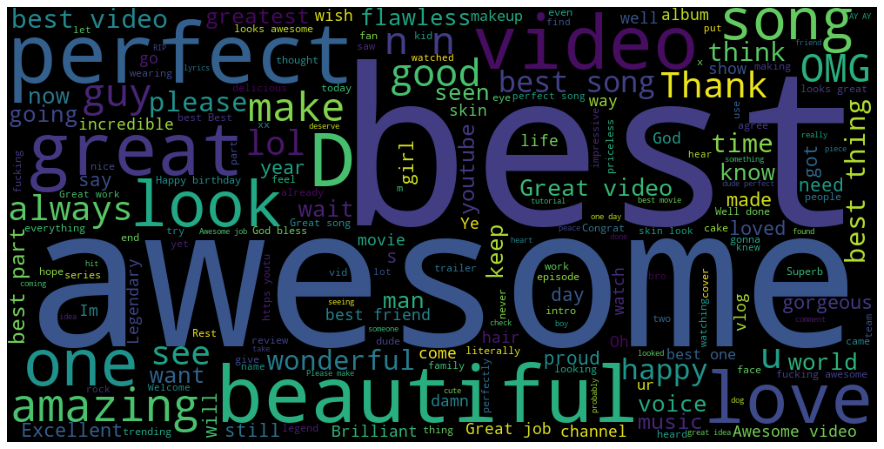

In [19]:
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.axis('off')

## Conclusion

## II) Negative Sentiment Analysis

In [20]:
negative_polarity = data[data['polarity_data'] == -1]

In [21]:
negative_polarity.head()

,video_id,comment_text,likes,replies,polarity_data
1387,ql0Op1VcELw,boring,0,0,-1.0
1394,ql0Op1VcELw,0:22 **laughs at terrible pun**,1,1,-1.0
1530,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0,0,-1.0
1745,F2uJvwiSZAQ,People making jokes about 9/11 is truly disgus...,1,0,-1.0
1793,F2uJvwiSZAQ,Thats insane.,0,0,-1.0


In [23]:
total_negative_comments = ' '.join(negative_polarity['comment_text'])

In [24]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_negative_comments)

(-0.5, 999.5, 499.5, -0.5)

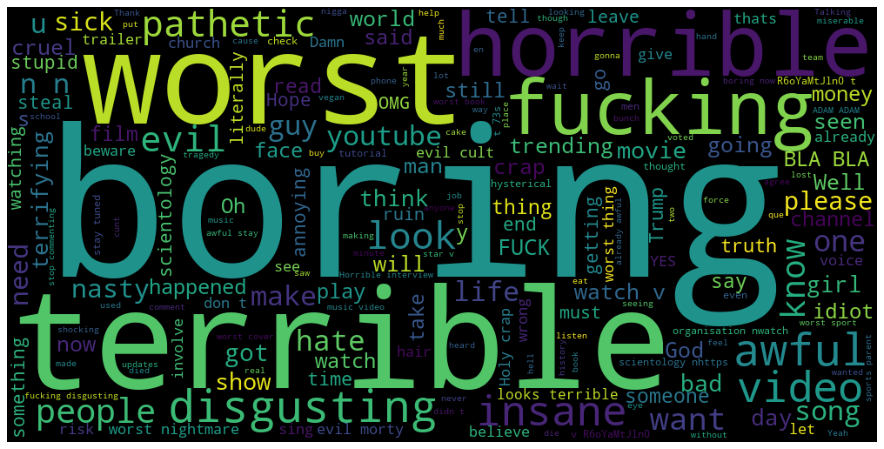

In [25]:
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.axis('off')

## Conclusion